# Runge-Kutta Methods
## Prepared by Maxim Khagay
### School of Science and Technology, Nazarbayev University

## Abstract
This report performs the Runge-Kutta methods to solve the equation $\frac{dy}{dx} = (1 + 2x)\sqrt{y}$ over the inverval from $x = 0$ to $x = 1$ using a step size of $0.1$ with $y(0) = 1$. These methods are used: Analytically, Euler's method, Midpoint method, Heun's method, 3rd-order Runge-Kutta method and 4th-order Runge-Kutta method. Report will provide a graph of each method compared to theoretical results. After that in report we will see standard error and last point error and compare them with global error. Morever report will provide a standard error rank. 
## Introduction
All methods are useful to solve the differential equation and have different global error(we will introduce it later). 

### Theory
As we said our equation is $\frac{dy}{dx} = (1 + 2x)\sqrt{y}$, so will use it as $f(x_i, y_i)$, and stepsize $h = 0.1$. We have eleven points. All methods obtain $y_{i + 1}$ by knowing first value $y(0) = 1$.

First of all let's analytically obtain value of $y$ from differential equation:

$y(x) = (\frac{x + x^2}{2}+1)^2$

All methods are described in Chapra and Canale's book. Let's just introduce formulas to calculate $y_{i+1}$ and global error of each method. 

Euler's method:

$y_{i + 1} = y_i + f(x_i, y_i)h$
    
Global error - $O(h)$

Heuns's method:

Predictor: $y_{i + 1}^0 = y_i + f(x_i, y_i)h$

Corrector: $y_{i + 1} = y_i  + \frac{f(x_i, y_i) + f(x_{i+1}, y_{i+1}^0)}{2}h$

Global error - $O(h^2)$

Midpoint method:

$x_{i+1/2} = x_{i} + \frac{h}{2}$ $and$ $y_{i+1/2} = y_{i} + f(x_i,y_i)\frac{h}{2}$

$y_{i + 1} = y_i  + f(x_{i+1/2}, y_{i+1/2})h$

3rd-order Runge-Kutta Method:

$y_{i+1} = y_i + \frac{1}{6}(k_1+4k_2+k_3)h$

$k_1 = f(x_i, y_i)$

$k_2 = f(x_i + \frac{1}{2}h, y_i + \frac{1}{2}k_1h)$

$k_3 = f(x_i + h, y_i - k_1h + 2k_2h)$

4th-order Runge-Kutta Method:

$y_{i+1} = y_i + \frac{1}{6}(k_1+2k_2+2k_3+k_4)h$

$k_1 = f(x_i, y_i)$

$k_2 = f(x_i + \frac{1}{2}h, y_i + \frac{1}{2}k_1h)$

$k_3 = f(x_i + \frac{1}{2}h, y_i + \frac{1}{2}k_2h)$

$k_4 = f(x_i + h, y_i + k_3h)$


### Error
We will use standard error formula to calculate error of all poins:
\begin{equation*}
error = \sqrt\frac{\sum(y(x_i) - y_i)^2}{n}
\end{equation*}
Where $y(x_i)$ is analytical result and $y_i$ is value obtained from method.

And for the last point we will take its absolute difference from analytical result:
\begin{equation*}
error_n = |y_n - y(x_n)|
\end{equation*}


## Methods
Here we introduce all needed functions and methods. For each method we will calculate standard error in it.

First of all let's provide a graph of analytical results of this equation. True values of $y(x)$

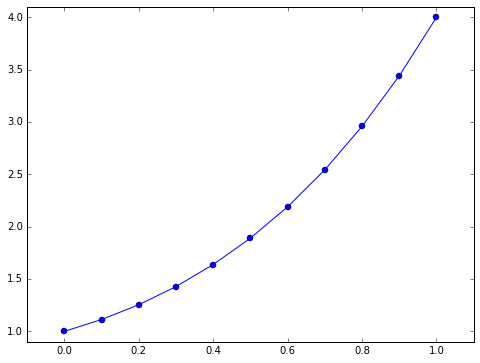

In [161]:
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from time import time
from math import exp, sqrt
import numpy as np

def f(x,y):
    return (1 + 2*x)*sqrt(y) 
def y(x):
    return ((x + x * x) / 2 + 1)**2

error = np.array(np.zeros(5, float))
name = ["Euler's method", "Heun's method", "Midpoint method", "3rd-order Runge-Kutta method", "4rd-order Runge-Kutta method"]
                 
h = 0.1
n = 10
x = np.array(np.zeros(n + 1), float)
yt = np.array(np.zeros(n + 1), float)

for i in range(n + 1):
    x[i] = i * h
    yt[i] = y(x[i])
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
axes = gca()
axes.set_xlim([-0.1,1.1])
axes.set_ylim([0.9,4.1])
plot(x, yt, 'bo')
plot(x, yt)
show()

Here we use Euler's method. Blue is a true values and green is values of method.

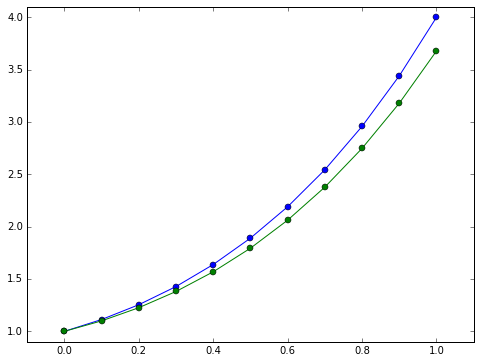

In [162]:
yn = np.array(np.zeros(n + 1), float)
yn[0] = 1;
error[0] = 0
for i in range(n):
    yn[i + 1] = yn[i] + f(x[i], yn[i]) * h
    error[0] += (yn[i] - yt[i])**2
error[0] /= n
error[0] = sqrt(error[0])

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
axes = gca()
axes.set_xlim([-0.1,1.1])
axes.set_ylim([0.9,4.1])
plot(x, yt)
plot(x, yn)
plot(x, yt, 'bo')
plot(x, yn, 'go')
show()

Here we use Heun's method. You will see just green line with green points because of error is too small to see it in graph.

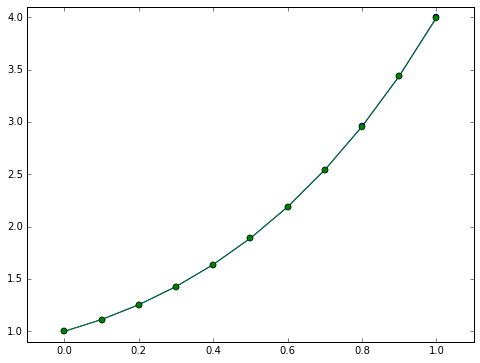

In [163]:
y0 = np.array(np.zeros(n + 1), float)
yh = np.array(np.zeros(n + 1), float)
yh[0] = 1
error[1] = 0
for i in range(n):
    y0[i + 1] = yh[i] + f(x[i], yh[i]) * h
    yh[i + 1] = yh[i] + (f(x[i], yh[i]) + f(x[i + 1], y0[i + 1])) * h / 2
    error[1] += (yh[i] - yt[i])**2
error[1] /= n
error[1] = sqrt(error[1])

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
axes = gca()
axes.set_xlim([-0.1,1.1])
axes.set_ylim([0.9,4.1])
plot(x, yt)
plot(x, yh)
plot(x, yt, 'bo')
plot(x, yh, 'go')
show()

Here we use Midpoint method and the same problem to see the difference.

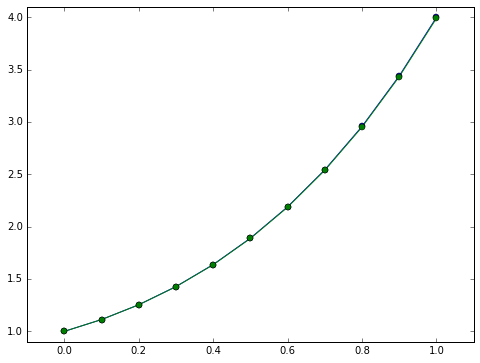

In [164]:
ym = np.array(np.zeros(n + 1), float)
ym[0] = 1;
error[2] = 0
for i in range(n):
    y1 = ym[i] + f(x[i], ym[i]) * h / 2
    ym[i + 1] = ym[i] + f(x[i] + h / 2, y1) * h
    error[2] += (ym[i] - yt[i])**2
error[2] /= n
error[2] = sqrt(error[2])

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
axes = gca()
axes.set_xlim([-0.1,1.1])
axes.set_ylim([0.9,4.1])
plot(x, yt)
plot(x, ym)
plot(x, yt, 'bo')
plot(x, ym, 'go')
show()

Here we use 3rd-order Runge-Kutta method.

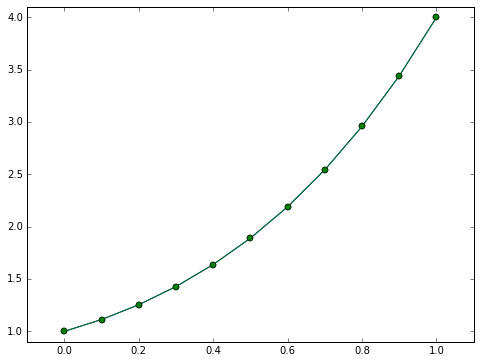

In [165]:
y3 = np.array(np.zeros(n + 1), float)
y3[0] = 1;
error[3] = 0
for i in range(n):
    k1 = f(x[i], y3[i])
    k2 = f(x[i] + h / 2, y3[i] + k1 * h / 2)
    k3 = f(x[i] + h, y3[i] - k1 * h + 2 * k2 * h)
    y3[i + 1] = y3[i] + (k1 + 4 * k2 + k3) * h / 6
    error[3] += (y3[i] - yt[i])**2
error[3] /= n
error[3] = sqrt(error[3])

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
axes = gca()
axes.set_xlim([-0.1,1.1])
axes.set_ylim([0.9,4.1])
plot(x, yt)
plot(x, y3)
plot(x, yt, 'bo')
plot(x, y3, 'go')
show()

Here we use 4rd-order Runge-Kutta method.

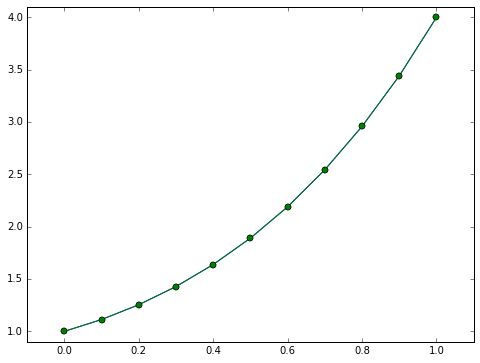

In [166]:
y4 = np.array(np.zeros(n + 1), float)
y4[0] = 1;
error[4] = 0
for i in range(n):
    k1 = f(x[i], y4[i])
    k2 = f(x[i] + h / 2, y4[i] + k1 * h / 2)
    k3 = f(x[i] + h / 2, y4[i] + k2 * h / 2)
    k4 = f(x[i] + h, y4[i] + k3 * h)
    y4[i + 1] = y4[i] + (k1 + 2 * k2 + 2  * k3  + k4) * h / 6
    error[4] += (y4[i] - yt[i])**2
error[4] /= n
error[4] = sqrt(error[4])

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
axes = gca()
axes.set_xlim([-0.1,1.1])
axes.set_ylim([0.9,4.1])
plot(x, yt)
plot(x, y4)
plot(x, yt, 'bo')
plot(x, y4, 'go')
show()

Now we can sort methods in terms of standard error.

In [167]:
for i in range(5):
    for j in range(i + 1, 5):
        if (error[i] > error[j]):
            d = error[i]
            error[i] = error[j]
            error[j] = d
            d = name[i]
            name[i] = name[j]
            name[j] = d 
print("Rank of standard error")
for i in range(5):
    print(name[i], '-' , error[i])

Rank of standard error
4rd-order Runge-Kutta method - 1.7970022774e-06
3rd-order Runge-Kutta method - 2.81691561681e-05
Heun's method - 0.00180717284364
Midpoint method - 0.00363208513814
Euler's method - 0.131864874083


And in the last step we take error of the last point in each method.

In [168]:
print("Euler's method - ", abs(yt[n] - yn[n]))
print("Heun's method - ", abs(yt[n] - yh[n]))
print("Midpoint method - ", abs(yt[n] - ym[n]))
print("3rd-order Runge-Kutta method - ", abs(yt[n] - y3[n]))
print("4rd-order Runge-Kutta method - ", abs(yt[n] - y4[n]))

Euler's method -  0.321428458791
Heun's method -  0.00489539374391
Midpoint method -  0.00893667875118
3rd-order Runge-Kutta method -  9.53054349191e-05
4rd-order Runge-Kutta method -  4.55217454176e-06


## Discussion
Now after all operations we can see standard error of each method. It is obvious that as high order of Runge-Kutta we use, the error decreases. So we such observations with $h = 0.1$:

Standar error:

Euler's method: $0.132 ≃ O(h) ≃ O(0.1)$  
Heun's method: $0.0036 ≃ O(h^2) ≃ O(0.01)$  
Midpoint method: $0.0018 ≃ O(h^2) ≃ O(0.01)$  
3rd-order method: $0.0000282 ≃ O(h^3) ≃ O(0.001)$  
4rd-order method: $0.000001797 ≃ O(h^4) ≃ O(0.0001)$  

Error of the last point:

Euler's method: $0.321 ≃ O(h) ≃ O(0.1)$  
Heun's method: $0.0048 ≃ O(h^2) ≃ O(0.01)$  
Midpoint method: $0.0089 ≃ O(h^2) ≃ O(0.01)$  
3rd-order method: $0.0000953 ≃ O(h^3) ≃ O(0.001)$  
4rd-order method: $0.0000045 ≃ O(h^4) ≃ O(0.0001)$  

We see that methods are proportional to global error. However deviation increases as order is a higher.


## Conclusion
In this report we saw five order methods of Runge-Kutta Method. We provide a graph for each method with a comparing to analytical results. In the last step we assess the error of standard error and of the last point.  

<span style="color:red">Good. 100% </span>
